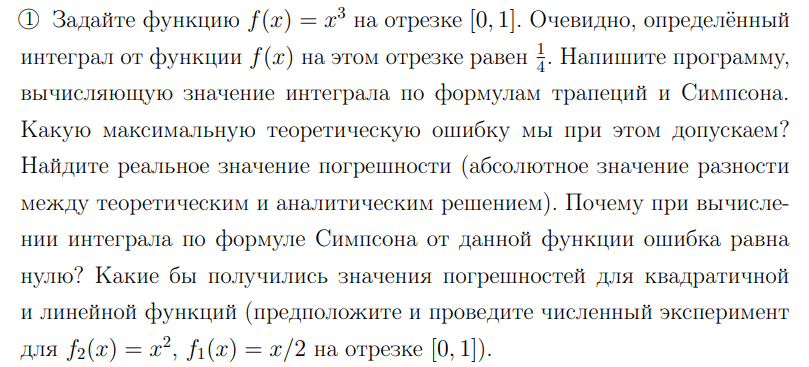

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider


def trapezoidal_rule(x_i, y_i):
    assert len(x_i) == len(y_i) and len(x_i) >= 2
    y = list(y_i)
    y[0] /= 2
    y[-1] /= 2
    h = x_i[1] - x_i[0]
    return (sum(y) * h)


def simpson(x_i, y_i):
    assert len(x_i) == len(y_i) and len(x_i) >= 2
    if len(x_i) % 2 != 1:
        raise ValueError('Length of the array must be even')
    h = (x_i[-1] - x_i[0]) / (len(x_i) - 1)
    return h / 3 * (y_i[0] + y_i[-1] + 2 * sum(y_i[i] for i in range(2, len(y_i) - 1) if i % 2 == 0) + 4 * sum(
        y_i[i] for i in range(len(y_i)) if i % 2 == 1))


if __name__ == '__main__':
    x_i = tuple(np.linspace(0, 1, 111))
    y_i = tuple(i ** 3 for i in x_i)

    print("Trapeziodal")
    print(trapezoidal_rule(x_i, y_i))
    print("Simpson")
    print(simpson(x_i, y_i))

Trapeziodal
0.2500206611570247
Simpson
0.25


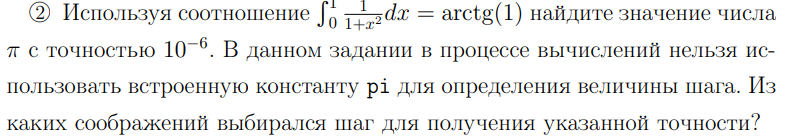

In [4]:
from numpy import linspace
from math import pi as real_pi

def simpson(x_i, y_i):
    assert len(x_i) == len(y_i) and len(x_i) >= 2
    if len(x_i) % 2 != 1:
        raise ValueError('Length of the array must be even')
    h = (x_i[-1] - x_i[0]) / (len(x_i) - 1)
    return h / 3 * (y_i[0] + y_i[-1] + 2 * sum(y_i[i] for i in range(2, len(y_i) - 1) if i % 2 == 0) + 4 * sum(
        y_i[i] for i in range(len(y_i)) if i % 2 == 1))


x = (0, 0.5, 1)
y = tuple(1 / (1 + i ** 2) for i in x)
last_pi = simpson(x, y) * 4
while True:
    x = tuple(linspace(0, 1, len(x) + 2))
    y = tuple(1 / (1 + i ** 2) for i in x)
    pi = simpson(x, y) * 4
    if abs(pi - last_pi) < 10 ** (-6):
        break
    last_pi = pi
print(f'Number segments: {len(x) - 1}\n{pi=}\ndifference with true pi = {abs(real_pi - pi)}')


Number segments: 8
pi=3.141592502458707
difference with true pi = 1.5113108631226169e-07


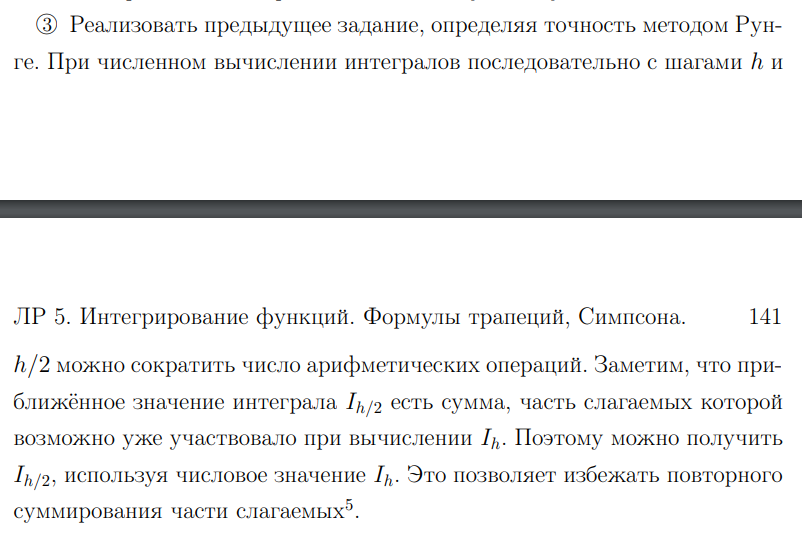

In [5]:
import numpy as np
from math import pi as real_pi

def simpson(x_i, y_i):
    assert len(x_i) == len(y_i) and len(x_i) >= 2
    if len(x_i) % 2 != 1:
        raise ValueError('Length of the array must be even')
    h = (x_i[-1] - x_i[0]) / (len(x_i) - 1)
    return h / 3 * (y_i[0] + y_i[-1] + 2 * sum(y_i[i] for i in range(2, len(y_i) - 1) if i % 2 == 0) + 4 * sum(
        y_i[i] for i in range(len(y_i)) if i % 2 == 1))

n=2
EPS=10**(-6)
f=lambda x:1/(1+x**2)
x_n=tuple(np.linspace(0,1,n+1))
y_n=tuple(f(x) for x in x_n)
int_n=simpson(x_n,y_n)
while True:
    x_2n=tuple(np.linspace(0,1,2*n+1))
    y_2n=tuple(f(x) for x in x_2n)
    int_2n=simpson(x_2n,y_2n)
    if abs(int_2n-int_n)/15<EPS:
        break
    y_n=y_2n
    x_n=x_2n
    int_n=int_2n
    n*=2
print(f"Pi={int_2n*4}\ndifference with real pi {abs(int_2n*4-real_pi)}")


Pi=3.141592502458707
difference with real pi 1.5113108631226169e-07
